In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [54]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)

In [55]:
# 4 CPUs
file = '/home/yongha/meent_test/1DFreeFormDQN/experiments/DQN/2022_09_25_02_38_30/wl900.0_angle60.0_ncells64/comp_table.csv'
df = pd.read_csv(file)
df.drop('Unnamed: 0', axis=1, inplace=True)

In [56]:
df.describe()

,reti-1,reti0,reti+1,meent-1,meent0,meent+1,t_reti,tpr_reti,t_meent,tpr_meent
count,657765.000000,6.577650e+05,657765.000000,657765.000000,6.577650e+05,657765.000000,657765.000000,657765.000000,657765.000000,657765.000000
mean,0.124068,4.881294e-01,0.209770,0.124068,4.881292e-01,0.209770,0.135260,0.242222,0.024951,0.082919
std,0.122743,3.300071e-01,0.230513,0.122743,3.300070e-01,0.230512,0.026652,0.120432,0.004103,0.016315
min,0.000000,2.808122e-07,0.000000,0.000000,2.813251e-07,0.000000,0.109489,0.001679,0.010593,0.032394
25%,0.030466,1.587978e-01,0.042286,0.030466,1.587976e-01,0.042286,0.123168,0.156861,0.022607,0.073224
50%,0.083912,4.993769e-01,0.121558,0.083912,4.993764e-01,0.121558,0.125340,0.323499,0.023823,0.077806
75%,0.182785,8.141375e-01,0.291049,0.182785,8.141371e-01,0.291050,0.130220,0.326979,0.025142,0.082909
max,0.977177,9.991584e-01,0.991217,0.977177,9.991584e-01,0.991217,0.505301,0.344086,0.100190,0.266248


# TMM to reticolo

In [57]:
A, B = 'meent', 'reti'

In [58]:
df['gap-1'] = df[f'{A}-1'] - df[f'{B}-1']
df['gap0'] = df[f'{A}0'] - df[f'{B}0']
df['gap+1'] = df[f'{A}+1'] - df[f'{B}+1']
df['t_gap'] = df[f't_{A}'] - df[f't_{B}']
df['tpr_gap'] = df[f'tpr_{A}'] - df[f'tpr_{B}']

# Benchmark

## difference in transmittance

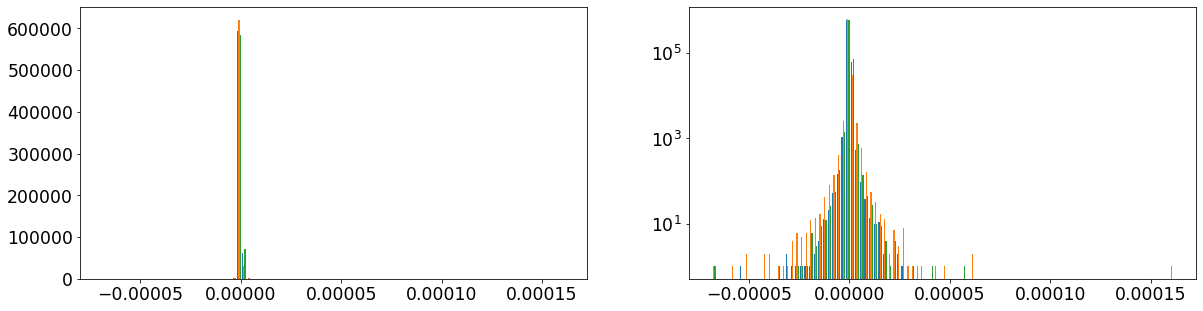

In [59]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
axes[0].hist([df['gap-1'], df['gap0'], df['gap+1']], bins=100)
axes[1].hist([df['gap-1'], df['gap0'], df['gap+1']], bins=100)
axes[1].set_yscale('log')
plt.show()

In [60]:
df[['gap-1','gap0','gap+1']].describe().T

,count,mean,std,min,25%,50%,75%,max
gap-1,657765.0,5.976029e-08,3.833901e-07,-0.000054,-1.778784e-08,5.517359e-08,1.688399e-07,0.000027
gap0,657765.0,-2.489618e-07,7.248672e-07,-0.000069,-4.777382e-07,-2.370042e-07,-5.319542e-08,0.000161
gap+1,657765.0,5.103273e-08,4.517604e-07,-0.000068,-1.677375e-08,6.228946e-08,1.866790e-07,0.000056


In [61]:
pd.concat([df['gap-1'], df['gap0'], df['gap+1']]).describe()

count    1.973295e+06
mean    -4.605625e-08
std      5.592558e-07
min     -6.868123e-05
25%     -2.049058e-07
50%      1.063637e-08
75%      1.313816e-07
max      1.613511e-04
dtype: float64

In [97]:
a=pd.concat([df['gap-1'], df['gap0'], df['gap+1']])
cut = 1E-5
b=a[abs(a) < cut]
b.count()/a.count() *100

99.97643535305161

In [63]:
df[abs(df['gap-1'])>cut][[f'{A}-1', f'{B}-1', 'gap-1']].sort_values('gap-1')

,meent-1,reti-1,gap-1
99288,0.188561,0.188614,-0.000054
201842,0.351407,0.351438,-0.000031
228368,0.171423,0.171453,-0.000030
219779,0.141208,0.141238,-0.000030
335079,0.315096,0.315121,-0.000025
...,...,...,...
622814,0.383418,0.383400,0.000018
57130,0.355774,0.355756,0.000019
265866,0.302560,0.302536,0.000024
558234,0.102674,0.102649,0.000026


In [64]:
df[abs(df['gap0'])>cut][[f'{A}0', f'{B}0', 'gap0']].sort_values('gap0')

,meent0,reti0,gap0
260103,0.430025,0.430094,-0.000069
103695,0.100898,0.100956,-0.000058
447255,0.611838,0.611890,-0.000052
38925,0.638698,0.638748,-0.000050
34002,0.752452,0.752494,-0.000042
...,...,...,...
358217,0.354658,0.354614,0.000043
4227,0.782375,0.782328,0.000047
467978,0.042923,0.042861,0.000062
261036,0.315009,0.314946,0.000062


In [65]:
df[abs(df['gap+1'])>cut][[f'{A}+1', f'{B}+1', 'gap+1']].sort_values('gap+1')

,meent+1,reti+1,gap+1
228368,0.088878,0.088946,-0.000068
335079,0.306637,0.306674,-0.000036
544685,0.384573,0.384600,-0.000026
525969,0.362891,0.362914,-0.000023
476613,0.462941,0.462963,-0.000021
...,...,...,...
489660,0.134885,0.134863,0.000022
201842,0.302953,0.302931,0.000023
592557,0.270942,0.270911,0.000031
260103,0.130702,0.130662,0.000040


## Normalized abs(difference in transmittance) 

In [66]:
cut = 0.01

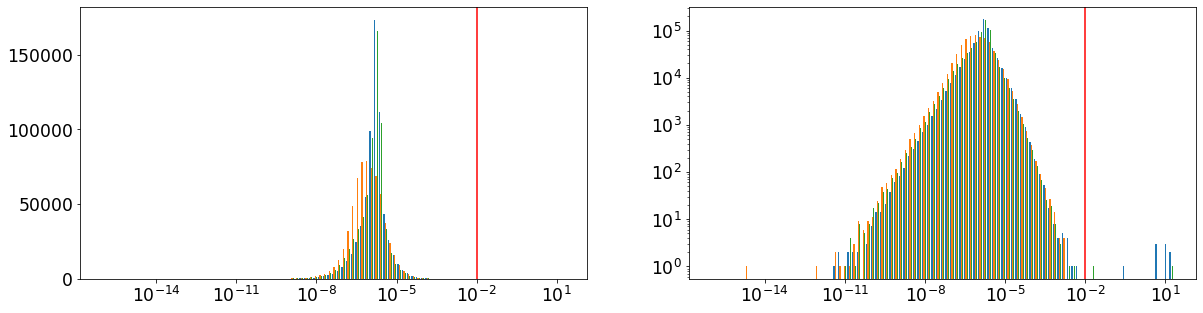

In [67]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
axes[0].axvline(cut, c='r')
axes[1].axvline(cut, c='r')

axes[0].hist([abs(df['gap-1']/df[f'{A}-1']), abs(df['gap0']/df[f'{A}0']), abs(df['gap+1']/df[f'{A}+1'])], bins=np.logspace(np.log10(1E-16), np.log10(20),100))
axes[0].set_xscale('log')

axes[1].hist([abs(df['gap-1']/df[f'{A}-1']), abs(df['gap0']/df[f'{A}0']), abs(df['gap+1']/df[f'{A}+1'])], bins=np.logspace(np.log10(1E-16), np.log10(20),100))
axes[1].set_xscale('log')
axes[1].set_yscale('log')

plt.show()

right side of vertical red line: normalized error >= 1 %

orange is 0th order

In [68]:
df[abs(df['gap-1']/df[f'{A}-1'])>cut][[f'{A}-1', f'{B}-1', 'gap-1']].sort_values('gap-1')

,meent-1,reti-1,gap-1
363440,4.458691e-33,2.731653e-26,-2.731653e-26
363438,4.721899e-31,1.527089e-26,-1.527042e-26
366559,1.062434e-28,5.792035e-28,-4.729601e-28
134134,3.033994e-29,3.768879e-28,-3.465480e-28
150562,5.611238e-30,1.848514e-28,-1.792401e-28
295005,3.123093e-30,1.300665e-28,-1.269434e-28
148857,3.309377e-32,1.255893e-28,-1.255562e-28
67959,1.581980e-30,8.501787e-29,-8.343589e-29
174473,1.472233e-31,8.303888e-29,-8.289166e-29
143365,1.549417e-30,8.384572e-29,-8.229631e-29


In [69]:
df[abs(df['gap0']/df[f'{A}0'])>cut][[f'{A}0', f'{B}0', 'gap0']].sort_values('gap0')

,meent0,reti0,gap0


In [70]:
df[abs(df['gap+1']/df[f'{A}+1'])>cut][[f'{A}+1', f'{B}+1', 'gap+1']].sort_values('gap+1')

,meent+1,reti+1,gap+1
363438,3.950558e-31,1.034171e-26,-1.034132e-26
363440,1.009114e-29,8.806046e-27,-8.795955e-27
134134,1.542608e-29,1.174921e-27,-1.159495e-27
143365,1.585785e-30,4.496819e-28,-4.480961e-28
366559,4.141874e-31,3.864570e-28,-3.860428e-28
330936,2.584801e-31,3.031613e-28,-3.029028e-28
25103,4.839259e-33,3.016976e-28,-3.016927e-28
8335,6.131564e-31,2.745942e-28,-2.739810e-28
148857,5.261609e-31,2.420287e-28,-2.415025e-28
248,2.584801e-31,1.919851e-28,-1.917266e-28


# benchmark - simulation time

## run time by time.time()

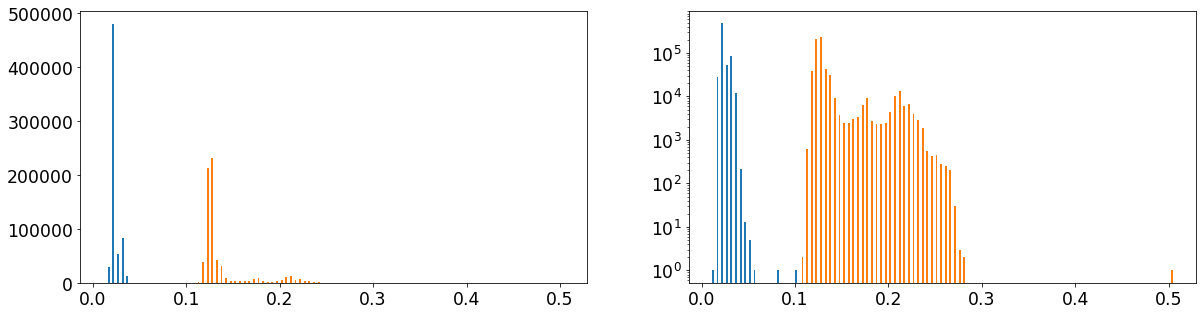

In [71]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
axes[0].hist([df[f't_{A}'],df[f't_{B}']], bins=100)
axes[1].hist([df[f't_{A}'],df[f't_{B}']], bins=100, log=True)
plt.show()

Blue is  meent-TMM, Oragne is reticolo with octave

## reticolo time / meent time

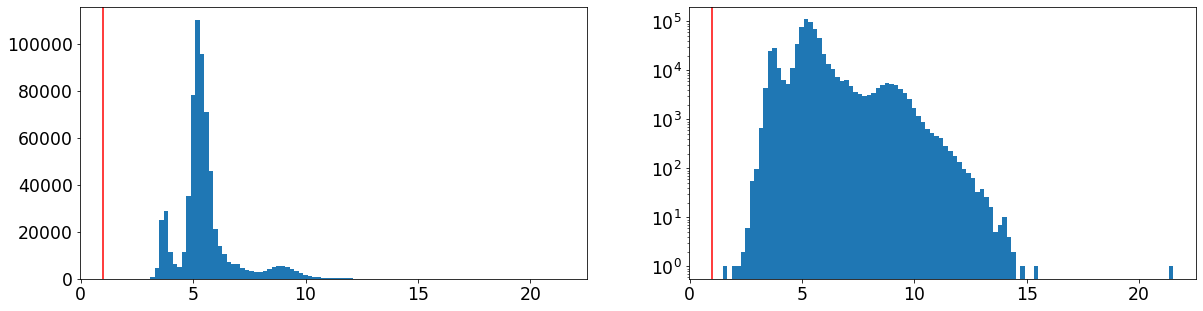

In [72]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
axes[0].axvline(1, c='r')
axes[1].axvline(1, c='r')
axes[0].hist((df[f't_{B}'])/df[f't_{A}'], bins=100)
axes[1].hist((df[f't_{B}'])/df[f't_{A}'], bins=100)
axes[1].set_yscale('log')
plt.show()

In [73]:
pd.DataFrame((df[f't_{B}']/df[f't_{A}']).describe()).T

,count,mean,std,min,25%,50%,75%,max
0,657765.0,5.532848,1.290887,1.483467,4.998557,5.312731,5.726137,21.514227


meent-TMM is faster 5.7 times than reticolo.

right side of red line: TMM is faster

## time.process_time()

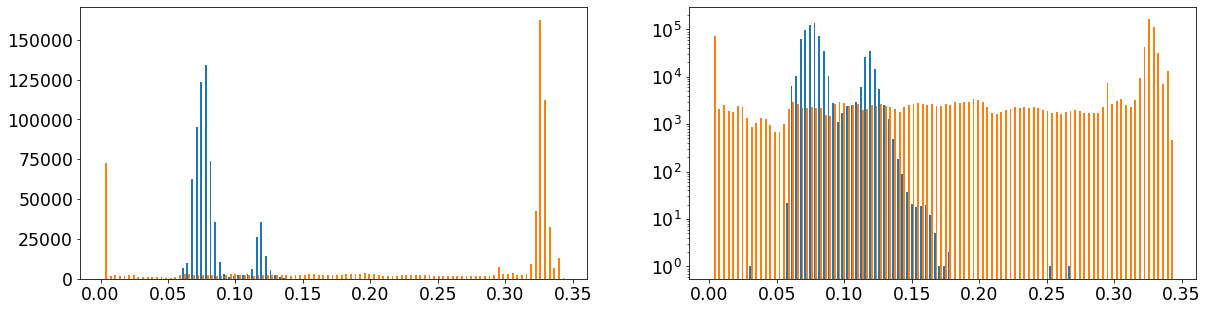

In [74]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
axes[0].hist([df[f'tpr_{A}'],df[f'tpr_{B}']], bins=100)
axes[1].hist([df[f'tpr_{A}'],df[f'tpr_{B}']], bins=100, log=True)
plt.show()

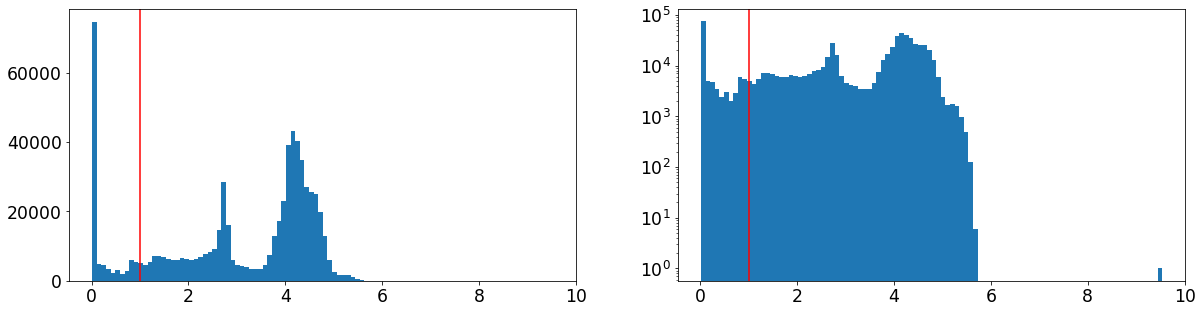

In [75]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
axes[0].axvline(1, c='r')
axes[1].axvline(1, c='r')
axes[0].hist((df[f'tpr_{B}'])/df[f'tpr_{A}'], bins=100)
axes[1].hist((df[f'tpr_{B}'])/df[f'tpr_{A}'], bins=100)
axes[1].set_yscale('log')
plt.show()

In [76]:
pd.DataFrame((df[f'tpr_{B}']/df[f'tpr_{A}']).describe()).T

,count,mean,std,min,25%,50%,75%,max
0,657765.0,3.005929,1.596232,0.013045,1.832295,3.786297,4.288502,9.535695


hard to tell...